In [2]:
import pandas as pd
from pydataset import data

In [4]:
df = data("mpg")
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [11]:
# Exercise - how many different manufacturers are there?
# Write a function called exercise1 that takes in a dataframe and returns the answer
def exercise1(df):
    return len(df.manufacturer.unique())


assert exercise1(df) == 15
print("Exercise 1 is correct")

Exercise 1 is correct


## Specific Pandas Questions
- How do I filter stuff? 
    - We filter using boolean masks (topic in the curriclum is called Indexing and Subsetting)
    - Applies to numpy, series, and dataframes
    - Answer is to use arrays/series of booleans
        - Begs the question, how do we get arrays of booleans?
        - Once we have an array of booleans, then what?

In [13]:
# How do we filter our dataframes?
# Show only the audi manufacturered vehicles

In [16]:
df.manufacturer

1            audi
2            audi
3            audi
4            audi
5            audi
          ...    
230    volkswagen
231    volkswagen
232    volkswagen
233    volkswagen
234    volkswagen
Name: manufacturer, Length: 234, dtype: object

In [15]:
# Step 1 is to make an array of booleans
# If we need the manufacturer to be the string "audi", then
# we should compare the manufacturer column to the string "audi"
df.manufacturer == "audi"

1       True
2       True
3       True
4       True
5       True
       ...  
230    False
231    False
232    False
233    False
234    False
Name: manufacturer, Length: 234, dtype: bool

In [18]:
# Use the array of booleans inside the square brackets after the dataframe name
audis = df[df.manufacturer == "audi"]
audis

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
7,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
8,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
9,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
10,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


In [21]:
is_audi = df.manufacturer == "audi"
is_audi.head()

1    True
2    True
3    True
4    True
5    True
Name: manufacturer, dtype: bool

In [22]:
city_greater_than_20 = df.cty > 20
city_greater_than_20.head()

1    False
2     True
3    False
4     True
5    False
Name: cty, dtype: bool

In [26]:
# Filter out only audis with city mileage > 20
# We can build multiple arrays of booleans and combine them with & for and, | for or
# See indexing + subsetting in pandas series lesson
# select * from df where manufacturer = 'audi' and cty > 20
df[is_audi & city_greater_than_20]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact


In [27]:
df[(df.cty > 20) & (df.manufacturer == "audi")]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact


In [28]:
# Another approach to "AND" conditions with a dataframe it whittle down by each condition\
audi = df[df.manufacturer == "audi"]
audi[audi.cty > 20]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact


In [29]:
# class is a reserved word, so we need to do df["class"] or rename it
df.class

SyntaxError: invalid syntax (<ipython-input-29-251322824050>, line 1)

In [30]:
# if we have a column that is a reserved word in python/pandas, use the bracket syntax
df["class"]

1      compact
2      compact
3      compact
4      compact
5      compact
        ...   
230    midsize
231    midsize
232    midsize
233    midsize
234    midsize
Name: class, Length: 234, dtype: object

## Question about crosstabs vs pivot tables
- Crosstabs are summations of categoryA by categoryB
- Pivot tables are any kind of aggregation of a valueC by categoryA vs. categoryB

In [32]:
# Instead of each row being a single, specific vehicle
# Each row of a crosstab is each value of CategoryA
# Each column of a crosstab is each value of CategoryB
# Each field/intersection is the count of rows that belong to CatA and Catb
pd.crosstab(df.manufacturer, df["class"])

class,2seater,compact,midsize,minivan,pickup,subcompact,suv
manufacturer,,,,,,,
audi,0,15,3,0,0,0,0
chevrolet,5,0,5,0,0,0,9
dodge,0,0,0,11,19,0,7
ford,0,0,0,0,7,9,9
honda,0,0,0,0,0,9,0
hyundai,0,0,7,0,0,7,0
jeep,0,0,0,0,0,0,8
land rover,0,0,0,0,0,0,4
lincoln,0,0,0,0,0,0,3


In [42]:
# df.pivot_table(df, index='categoryA", columns='categoryB', values="numericColumnA")
# pivot table defaults to the mean of the values argument/column we specify
# NaNs means there no 2seater audis or volkswagen pickups
# Average city mileage for compact audis is 17.9
# Average city mileage for dodge minvans is 15.8
pd.pivot_table(df, index="manufacturer", columns="class", values=["cty"])

cty                                                         \
class        2seater    compact    midsize    minivan     pickup subcompact   
manufacturer                                                                  
audi             NaN  17.933333  16.000000        NaN        NaN        NaN   
chevrolet       15.4        NaN  18.800000        NaN        NaN        NaN   
dodge            NaN        NaN        NaN  15.818182  12.052632        NaN   
ford             NaN        NaN        NaN        NaN  13.000000  15.888889   
honda            NaN        NaN        NaN        NaN        NaN  24.444444   
hyundai          NaN        NaN  19.000000        NaN        NaN  18.285714   
jeep             NaN        NaN        NaN        NaN        NaN        NaN   
land rover       NaN        NaN        NaN        NaN        NaN        NaN   
lincoln          NaN        NaN        NaN        NaN        NaN        NaN   
mercury          NaN        NaN        NaN        NaN        NaN        NaN   
nissan           NaN  20.000000  20.000000        NaN        NaN        NaN   
pontiac          NaN        NaN  17.000000        NaN        NaN        NaN   
subaru           NaN  19.750000        NaN        NaN        NaN  19.500000   
toyota           NaN  22.250000  19.857143        NaN  15.571429        NaN   
volkswagen       NaN  20.785714  18.571429        NaN        NaN  24.000000   

                         
class               suv  
manufacturer             
audi                NaN  
chevrolet     12.666667  
dodge         11.857143  
ford          12.888889  
honda               NaN  
hyundai             NaN  
jeep          13.500000  
land rover    11.500000  
lincoln       11.333333  
mercury       13.250000  
nissan        13.750000  
pontiac             NaN  
subaru        18.833333  
toyota        14.375000  
volkswagen          NaN

In [40]:
# What's the average city mileage for audi compact vehicles
df[(df.manufacturer == "audi") & (df["class"] == "compact")].cty.mean()

17.933333333333334

<AxesSubplot:xlabel='manufacturer', ylabel='cty'>

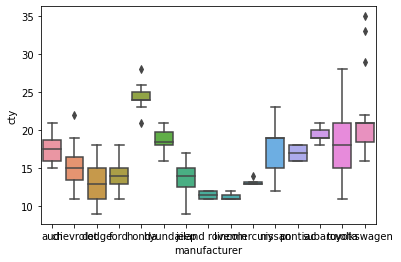

In [44]:
import seaborn as sns
# Boxplots allows us to compare distributions of a numeric value between categories
sns.boxplot(x="manufacturer", y="cty", data=df)

## Pandas Series Exercises

In [45]:
# How many vowels are in the Series?
# How many consonants are in the Series?
string = 'hnvidduckkqxwymbimkccexbkmqygkxoyndmcxnwqarhyffsjpsrabtjzsypmzadfavyrnndndvswreauxovncxtwzpwejilzjrmmbbgbyxvjtewqthafnbkqplarokkyydtubbmnexoypulzwfhqvckdpqtpoppzqrmcvhhpwgjwupgzhiofohawytlsiyecuproguy'
string

'hnvidduckkqxwymbimkccexbkmqygkxoyndmcxnwqarhyffsjpsrabtjzsypmzadfavyrnndndvswreauxovncxtwzpwejilzjrmmbbgbyxvjtewqthafnbkqplarokkyydtubbmnexoypulzwfhqvckdpqtpoppzqrmcvhhpwgjwupgzhiofohawytlsiyecuproguy'

In [46]:
# In order for us to make a series where each row/observation is a single letter
# We must first make a list where each element of the list is a letter
letters = list(string) # "somestring".split("")
letters

['h',
 'n',
 'v',
 'i',
 'd',
 'd',
 'u',
 'c',
 'k',
 'k',
 'q',
 'x',
 'w',
 'y',
 'm',
 'b',
 'i',
 'm',
 'k',
 'c',
 'c',
 'e',
 'x',
 'b',
 'k',
 'm',
 'q',
 'y',
 'g',
 'k',
 'x',
 'o',
 'y',
 'n',
 'd',
 'm',
 'c',
 'x',
 'n',
 'w',
 'q',
 'a',
 'r',
 'h',
 'y',
 'f',
 'f',
 's',
 'j',
 'p',
 's',
 'r',
 'a',
 'b',
 't',
 'j',
 'z',
 's',
 'y',
 'p',
 'm',
 'z',
 'a',
 'd',
 'f',
 'a',
 'v',
 'y',
 'r',
 'n',
 'n',
 'd',
 'n',
 'd',
 'v',
 's',
 'w',
 'r',
 'e',
 'a',
 'u',
 'x',
 'o',
 'v',
 'n',
 'c',
 'x',
 't',
 'w',
 'z',
 'p',
 'w',
 'e',
 'j',
 'i',
 'l',
 'z',
 'j',
 'r',
 'm',
 'm',
 'b',
 'b',
 'g',
 'b',
 'y',
 'x',
 'v',
 'j',
 't',
 'e',
 'w',
 'q',
 't',
 'h',
 'a',
 'f',
 'n',
 'b',
 'k',
 'q',
 'p',
 'l',
 'a',
 'r',
 'o',
 'k',
 'k',
 'y',
 'y',
 'd',
 't',
 'u',
 'b',
 'b',
 'm',
 'n',
 'e',
 'x',
 'o',
 'y',
 'p',
 'u',
 'l',
 'z',
 'w',
 'f',
 'h',
 'q',
 'v',
 'c',
 'k',
 'd',
 'p',
 'q',
 't',
 'p',
 'o',
 'p',
 'p',
 'z',
 'q',
 'r',
 'm',
 'c',
 'v',
 'h'

In [47]:
letters = pd.Series(letters)
letters

0      h
1      n
2      v
3      i
4      d
      ..
195    r
196    o
197    g
198    u
199    y
Length: 200, dtype: object

In [48]:
# We can use our vectorization operations
# How many vowels are in the Series?
letters.isin(["a", "e", "i", "o", "u"])

0      False
1      False
2      False
3       True
4      False
       ...  
195    False
196     True
197    False
198     True
199    False
Length: 200, dtype: bool

In [50]:
len(letters[letters.isin(["a", "e", "i", "o", "u"])])

34

In [51]:
# Using .apply
# Step 1: blow off anything having to do with series
# Step 2: Isolate the data type of a single value of that series you need to work on
# Step 3: write a function that does the thing you need it to (only a single value)
# Step 4: pass the function name into .apply

def is_vowel(letter):
    letter = letter.lower()
    return letter in ["a", "e", "i", "o", "u"]

letters.apply(is_vowel)

0      False
1      False
2      False
3       True
4      False
       ...  
195    False
196     True
197    False
198     True
199    False
Length: 200, dtype: bool

In [53]:
len(letters[letters.apply(is_vowel)])

34

In [54]:
letters[~letters.isin(["a", "e", "i", "o", "u"])]

0      h
1      n
2      v
4      d
5      d
7      c
8      k
9      k
10     q
11     x
12     w
13     y
14     m
15     b
17     m
18     k
19     c
20     c
22     x
23     b
24     k
25     m
26     q
27     y
28     g
29     k
30     x
32     y
33     n
34     d
35     m
36     c
37     x
38     n
39     w
40     q
42     r
43     h
44     y
45     f
46     f
47     s
48     j
49     p
50     s
51     r
53     b
54     t
55     j
56     z
57     s
58     y
59     p
60     m
61     z
63     d
64     f
66     v
67     y
68     r
69     n
70     n
71     d
72     n
73     d
74     v
75     s
76     w
77     r
81     x
83     v
84     n
85     c
86     x
87     t
88     w
89     z
90     p
91     w
93     j
95     l
96     z
97     j
98     r
99     m
100    m
101    b
102    b
103    g
104    b
105    y
106    x
107    v
108    j
109    t
111    w
112    q
113    t
114    h
116    f
117    n
118    b
119    k
120    q
121    p
122    l
124    r
126    k
127    k
128    y
129    y
1